In [2]:
import albumentations as alb
from PIL import Image
import numpy as np
import cv2
import pandas as pd

In [3]:
augumentor = alb.Compose([
    alb.RandomCrop(width=600, height=315),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)
])

In [4]:
img_path = './data/train/images/dvh1.jpg'
image = np.array(Image.open(img_path))

In [12]:
augmented_images = [augumentor(image=image)['image'] for _ in range(5)]

In [13]:
for i, augmented_image in enumerate(augmented_images):
    augmented_img = Image.fromarray(augmented_image)
    augmented_img.save(f"augmented_image_{i+1}.jpg")

In [14]:
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

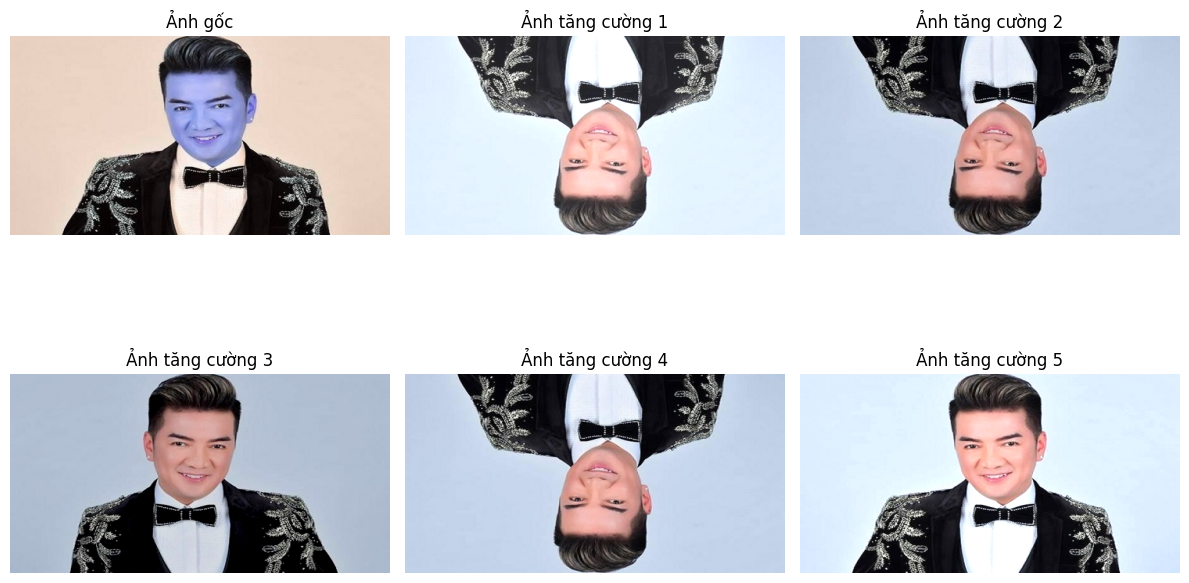

In [15]:
import matplotlib.pyplot as plt
num_cols = 3
num_rows = (len(augmented_images) // num_cols) + (len(augmented_images) % num_cols > 0)

plt.figure(figsize=(12, 8))

plt.subplot(num_rows, num_cols, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis('off')

for i, augmented_image in enumerate(augmented_images):
    plt.subplot(num_rows, num_cols, i + 2)
    plt.imshow(augmented_image)
    plt.title(f"Ảnh tăng cường {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:

data = {'Ảnh': ['Ảnh gốc'] + [f'Ảnh tăng cường {i+1}' for i in range(len(augmented_images))],
        'MSE': [None] * (len(augmented_images) + 1),
        'PSNR': [None] * (len(augmented_images) + 1)}

data['MSE'][0] = 0  

for i, augmented_image in enumerate(augmented_images):
    augmented_image_rgb = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)
    mse = np.mean((image - augmented_image_rgb) ** 2)
    psnr = calculate_psnr(image, augmented_image_rgb)
    data['MSE'][i+1] = mse
    data['PSNR'][i+1] = psnr

df = pd.DataFrame(data)

print(df)

                Ảnh         MSE       PSNR
0           Ảnh gốc    0.000000        NaN
1  Ảnh tăng cường 1   95.587369  28.326799
2  Ảnh tăng cường 2  103.867608  27.966002
3  Ảnh tăng cường 3  117.967533  27.413179
4  Ảnh tăng cường 4  103.867608  27.966002
5  Ảnh tăng cường 5  102.541496  28.021807
